# **Practica 0**

### *Métodos Estadísticos y Numéricos en Cosmología*

#### *Hugo Rivera Morales*

## Paqueterias

In [40]:
#Paqueterias
import numpy as np
import matplotlib.pyplot as plt

## **1 Exercise : check the error evolution**

In one code, generate 100 times:

*Normal random trails of 10 elements with variance = 1*

*Normal random trails of 100 elements with variance = 1*

*Normal random trails of 1000 elements with variance = 1*

Evaluate the mean of each realisation and then the standard deviation of the means for each group 100 realisations (1 stdev for 10 elements, one for 100 elements and one for 100 elements) report the results of the 3 standard deviations in one plot and compare with expected value $1/\sqrt{N}$ (because each trial is with variance = 1).

## Variables

In [41]:
#Variables
width = 1 #initial variance
n = np.array([10, 100, 1000]) #number of random numbers
n_bin = 50 #bines
trials = 10000 #number of realizations
x1 = np.linspace(-1, 1, 1000) #the x coordinate
#arrays con los valores medios de cada realización
mean_array_10 = np.zeros(trials) 
mean_array_100 = np.zeros(trials)
mean_array_1000 = np.zeros(trials)
d_10 = np.zeros(trials)
d_100 = np.zeros(trials)
d_1000 = np.zeros(trials)

## Loop   

In [42]:
#100 realizations for each n
for i in range(trials):
    d_10[i] = np.mean(np.random.normal(scale = width, size = n[0]))
    mean_array_10[i] = d_10[i]
    d_100[i] = np.mean(np.random.normal(scale = width, size = n[1]))
    mean_array_100[i] = d_100[i]
    d_1000[i] = np.mean(np.random.normal(scale = width, size = n[2]))
    mean_array_1000[i] = d_1000[i]

### Resultados en arrays

In [43]:
#array with the arrays of the stdv of the 100 realizations
means_arrays = np.array([mean_array_10, mean_array_100, mean_array_1000])
#standard desviation of the 3 experiments
stdv = np.array([np.std(mean_array_10), np.std(mean_array_100), np.std(mean_array_1000)])
#mean value of the 3 experiments
means = np.array([np.mean(mean_array_10), np.mean(mean_array_100), np.mean(mean_array_1000)])

### Theorical distribution

La distribución normal viene descrita de la siguiente forma:

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$$

Donde $\mu$ es el mean value y $\sigma$ la desviación estándar.\
Por otra parte se espera que el error siga la relación:

$$\frac{1}{\sqrt{N}}$$

Donde $N$ es el numero de puntos o en este caso de numeros aleatorios.

In [44]:
#Theorical
#normal distribution
def y(x, mean, std): 
    return (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std )**2)
#terror
def Error(N): 
    return 1 / (np.sqrt(N))

## Plots

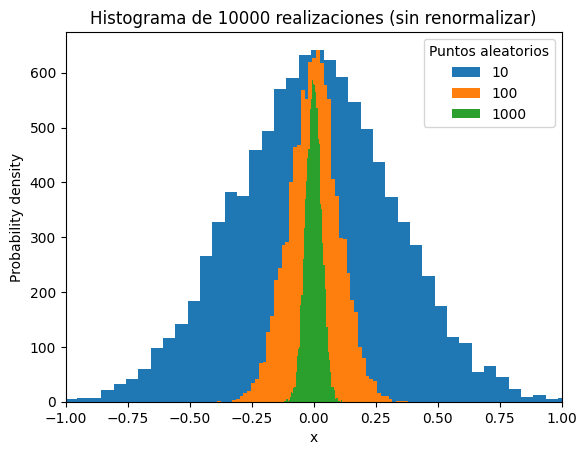

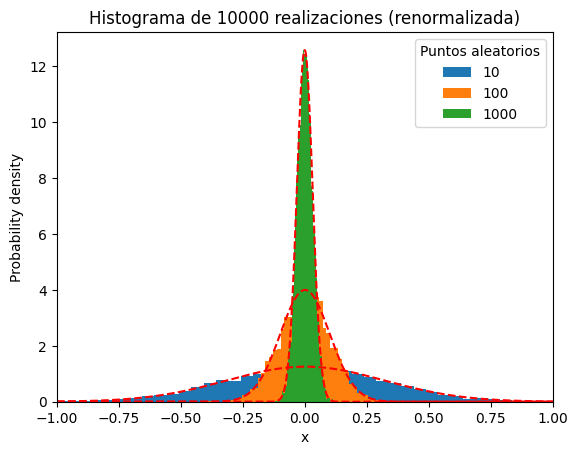

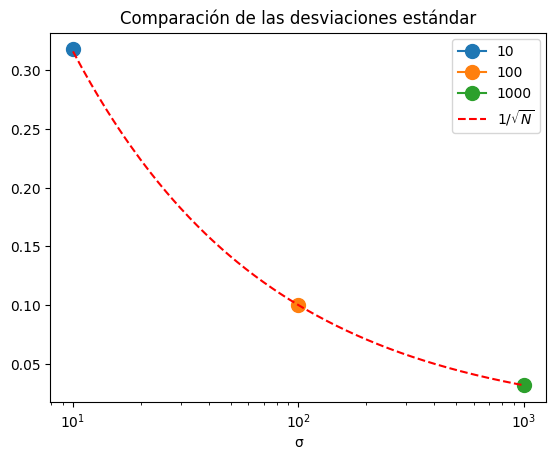

In [45]:
#Plots
labels = ['10', '100', '1000']
fig, ax = plt.subplots()
ax.set_xlim(-1,1)
for i, j in zip(means_arrays, labels):
    ax.hist(i, n_bin, label=j)
    ax.legend(prop={'size': 10}, title = "Puntos aleatorios")
ax.set_xlabel('x')
ax.set_ylabel('Probability density')
ax.set_title(f'Histograma de {trials} realizaciones (sin renormalizar)')
plt.show()

#plot renormalizado
fig, ax = plt.subplots()
ax.set_xlim(-1,1)
#plot each result
for i, j in zip(means_arrays, labels):
    nx, bins, patches = ax.hist(i, n_bin, density=True, label=j)
    ax.legend(prop={'size': 10}, title = "Puntos aleatorios")
#add a 'theorical' line
for i, j in zip(means, stdv):
    ax.plot(x1, y(x1, i, j), '--', color='red')
ax.set_xlabel('x')
ax.set_ylabel('Probability density')
ax.set_title(f'Histograma de {trials} realizaciones (renormalizada)')
plt.show()

#plot desviaciones estándar
x2 = np.linspace(n[0], n[-1], 1000)
fig, ax = plt.subplots()
ax.set_xscale("log")
for i in range(len(stdv)):
    ax.plot(n[i], stdv[i], marker="o", markersize=10, label = f'{n[i]}')
    ax.legend(prop={'size': 10})
ax.plot(x2, Error(x2), '--', color='red', label = r'1/$\sqrt{N}$')
ax.legend(prop={'size': 10})
ax.set_xlabel('\u03C3')
ax.set_title(f'Comparación de las desviaciones estándar')
plt.show()

## Resultados

### Desviación estándar

In [46]:
for i in range(0,len(stdv)):
     print(f"Para", n[i], "puntos, \u03C3 =", stdv[i])

Para 10 puntos, σ = 0.3180059834828722
Para 100 puntos, σ = 0.09977035089080732
Para 1000 puntos, σ = 0.03171560367916581


### Mean values

In [47]:
for i in range(0,len(means)):
     print(f"Para", n[i], "puntos, \u03BC =", means[i])


Para 10 puntos, μ = 0.0026361120558604533
Para 100 puntos, μ = 0.0004827290285834769
Para 1000 puntos, μ = -0.0007315694607022851


## **2 Exercice : Random trial following a given PDF**

## 1) Read the file

In [48]:
result = np.loadtxt("C:\\Users\\hugor\\OneDrive\\Escritorio\\2\\cosmo\\PDF_double_gauss_2021.txt")
x_arr = result[:,0]
pdf_arr = result[:,1]

## 2) Determine the size of the element $dx$

In [49]:
dx = (x_arr[-1] - x_arr[0]) / (len(x_arr) - 1)
print(f'El elemento dx =', dx)

El elemento dx = 0.01


## 3) Check the sum

In [50]:
sum = np.sum(dx * pdf_arr)
print(f'La suma dx*pdf_arr =', sum)

La suma dx*pdf_arr = 0.999996352424793


## 4) Construct the cumulative distribution function (CDF)

In [51]:
cumul_arr = np.cumsum(pdf_arr)

## 5) Plot the PDF and the CDF

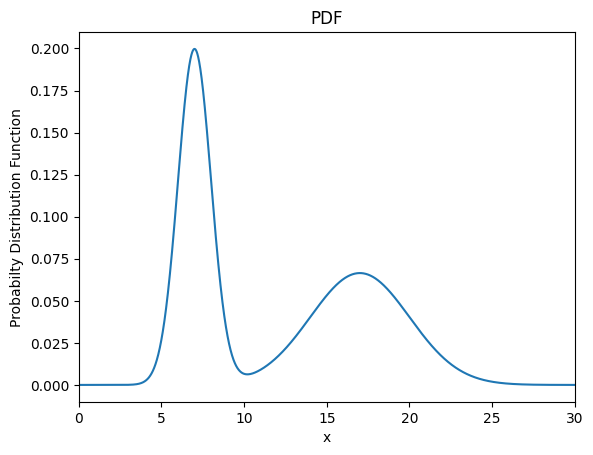

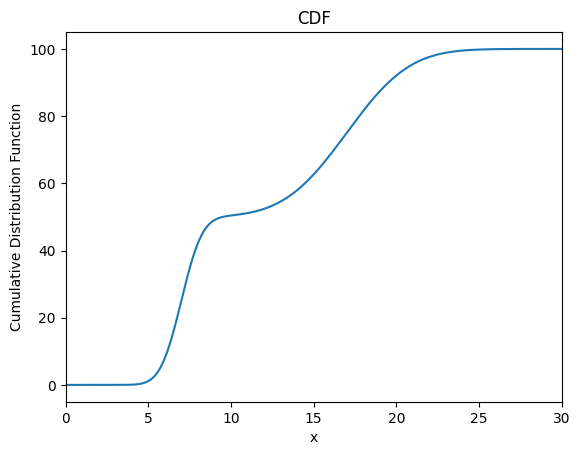

In [52]:
#Plots
#PDF
fig, ax = plt.subplots()
ax.set_xlim(x_arr[0],x_arr[-1])
ax.plot(x_arr, pdf_arr)
ax.set_xlabel('x')
ax.set_ylabel('Probabilty Distribution Function')
ax.set_title(f'PDF')
plt.show()

#CDF
fig, ax = plt.subplots()
ax.set_xlim(x_arr[0],x_arr[-1])
ax.plot(x_arr, cumul_arr)
ax.set_xlabel('x')
ax.set_ylabel('Cumulative Distribution Function')
ax.set_title(f'CDF')
plt.show()

## 6) Using uniform random trials and the CDF, generate 20000 random trials

In [53]:
n_trials =  20000 #number of random trials
#generate 'trials' numbers in the interval of x
myrandom_arr = np.random.uniform(cumul_arr[0], cumul_arr[-1], size=(n_trials))
x_gen = [] #los valores de x que son solución a la condición CDF(x)= random, i.e., generators
for i in range(myrandom_arr.shape[0]):
    w = myrandom_arr[i]
    p = np.absolute(cumul_arr - w)
    index = np.argmin(p)
    x_gen.append(x_arr[index])

## 7) Plot the normed histogram

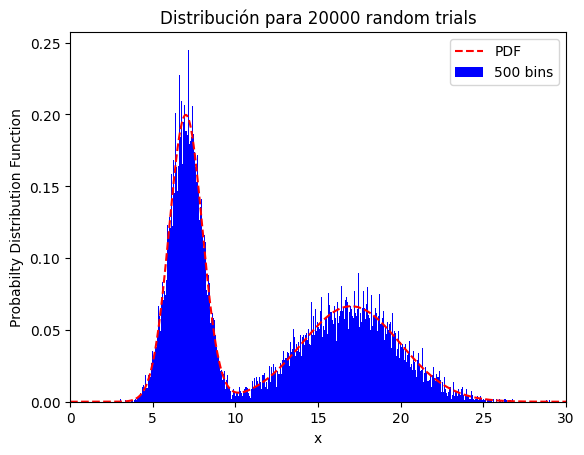

In [54]:
#Plot
n_bins = 500 #numero de bines
fig, ax = plt.subplots()
ax.set_xlim(x_arr[0], x_arr[-1])
ax.plot(x_arr, pdf_arr, '--', color='red', label = 'PDF')
ax.hist(x_gen, n_bins, density = True, color='blue', label = f'{n_bins} bins')
ax.legend(prop={'size': 10})
ax.set_xlabel('x')
ax.set_ylabel('Probabilty Distribution Function')
ax.set_title(f'Distribución para {n_trials} random trials')
plt.show()